<a href="https://colab.research.google.com/github/CantonCode/4th-Year-code/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For this assignment I have used a data set found on google which is based off Youtube. It has two datasets, X which contains likes disliked and subscribers of a video and its creator and Y which contains the views on the video.

# The purpose of this linear regression is to predict the number of views based on the number of likes dislikes and subribers a video has.

In [ ]:
#Importing relevant packages to use for my project
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

import seaborn as sns

# In order to use the data it must be imported ffrom the files it is contained in. We use pandas built in CSV reader to do this and organise the data into two data frames

In [ ]:
#Using pandas the read in the data and convert them to data frames
dataX = pd.read_csv('../StatsX.csv')

dataY = pd.read_csv('../StatsY.csv')

# In order to check that the data has been imported properly and holds the desired format it is important to print out some of the data. Here you can see that we print out both data sets and we can confirm its contents and format is correct.

In [ ]:
#Printing out the dataY frame to check its contents
print(dataY)
print(dataX)

        Views
0     1988888
1     2617005
2      932230
3     1165800
4      551165
...       ...
3359   193093
3360    21784
3361     5427
3362   150226
3363    29077

[3364 rows x 1 columns]
       Likes  Dislikes  Subscribers
0     104460      3365      7300000
1     103203      3570      3300000
2      22485       612      1800000
3      23077      1337       465000
4      12315       522     11000000
...      ...       ...          ...
3359    4833        47       465000
3360     118        16        19000
3361      29         2         6100
3362     321        34         3400
3363     143         7       116000

[3364 rows x 3 columns]


# Once the data is imported it is important to pre process the data to get it setup for input into our model. To do this I used a module from SKLearn train_test_split() to organise the data into testing and training data to feed into the model.


# We use the training data to minimise the cost while the testing data is a seperate chunk of data used for testing the models overall preformance. 

# We define the test size to 0.2 which means 80% of the data will be randomly selected for training while the other 20% will be selected for testing 



In [ ]:

x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.2)

It is then important to make sure we scale and normalize our data. This is especially important where inputs and outputs for different features vary greatly.

As you can see above when printing out our data the number of subsribers vs dislikes varies a lot and in a neural network this would cause for an under represtentaion of these perameters.



# From here we can work on our model that we will be using. In this model I use different learning rates to show how they can effect the learning algorithim

# I create a model that as 3 inputs, this correlates with the data we are feeding in : likes, dislikes and subsribers. The model will then have one output layers : Views

# I use the adam optimiser along with the mean squared error to adjust the models weights.

# The model is then ran and accuracy is graphed. We can see the R score on each iteration improve as the models learning rate is increased 



Epoch 1/500
76/76 [==============================] - 0s 2ms/step - loss: 50428117260435456.0000 - val_loss: 71955030218899456.0000
Epoch 2/500
76/76 [==============================] - 0s 1ms/step - loss: 67181006565670912.0000 - val_loss: 16666926608547840.0000
Epoch 3/500
76/76 [==============================] - 0s 989us/step - loss: 8123784074625024.0000 - val_loss: 11866638156562432.0000
Epoch 4/500
76/76 [==============================] - 0s 991us/step - loss: 7715168939147264.0000 - val_loss: 27976633134612480.0000
Epoch 5/500
76/76 [==============================] - 0s 1ms/step - loss: 311891316625637376.0000 - val_loss: 460825217489436672.0000
Epoch 6/500
76/76 [==============================] - 0s 1ms/step - loss: 381908045283721216.0000 - val_loss: 691661602067316736.0000
Epoch 7/500
76/76 [==============================] - 0s 996us/step - loss: 269509094744784896.0000 - val_loss: 93929491654508544.0000
Epoch 8/500
76/76 [==============================] - 0s 1ms/step - loss: 1

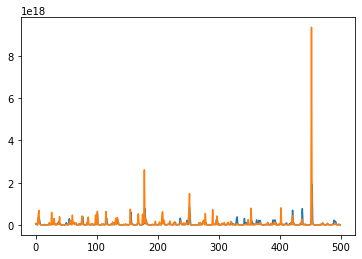

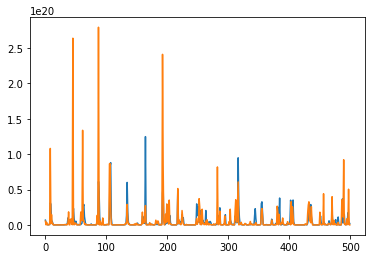

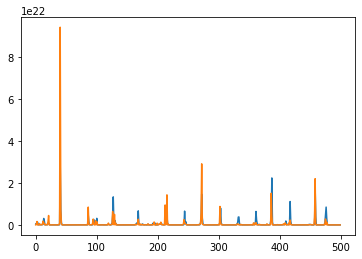

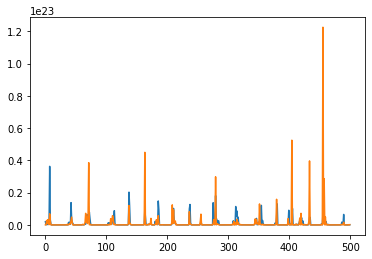

In [ ]:
LR = [100,1000,10000,15000]

for i in LR:
    #Defines linear regression model and its structure
    model = Sequential()
    model.add(Dense(1, input_shape=(3,)))
    
    #Compiles model
    model.compile(Adam(lr=i), 'mean_squared_error')
    
    #Fits model
    history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.1)
    history_dict=history.history
    
    #Plots model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values)
    plt.plot(val_loss_values)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculates and prints r2 score of training and testing data
    print("Training Set R2 is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
    print("TEsting Set R2 is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# I also decided to add an activation to the layer to see if it improved my model but there was minimal improvement between these models

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(3,), activation = 'relu'))
model.compile(Adam(lr=15000), 'mean_squared_error')
history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.1)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values)
plt.plot(val_loss_values)

In [ ]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculates and prints r2 score of training and testing data
print("Training set R2 is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("Test set R2 is is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# Above you can see that we have a relativetly high R2 score which shows that the accuracy of our model is quiet good and represents our data well

In [ ]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()




# As we can see the model is preforming quiet well and that the relationship is quiet linear